# Python Project

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

from import_clean_data import import_clean_airport_df

### Questions:

- Where do airlines must put their focus on to avoid delays?
- How are delays distributed across airlines, regions and causes?


In [2]:
pd.set_option('display.max_columns', None)

df = import_clean_airport_df('airport_data.csv')

importing data...
Binarize delay types...
Creating delay size variables...
Getting dummy variables for delay sizes...


In [3]:
df.head()

,MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,SIZE_CARRIER_DELAY_BIG_CARRIER_DELAY,SIZE_CARRIER_DELAY_MEDIUM_CARRIER_DELAY,SIZE_CARRIER_DELAY_NO_DELAY,SIZE_CARRIER_DELAY_SMALL_CARRIER_DELAY,SIZE_WEATHER_DELAY_BIG_WEATHER_DELAY,SIZE_WEATHER_DELAY_MEDIUM_WEATHER_DELAY,SIZE_WEATHER_DELAY_NO_DELAY,SIZE_WEATHER_DELAY_SMALL_WEATHER_DELAY,SIZE_LATE_AIRCRAFT_DELAY_BIG_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_MEDIUM_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_NO_DELAY,SIZE_LATE_AIRCRAFT_DELAY_SMALL_LATE_AIRCRAFT_DELAY,SIZE_NAS_DELAY_BIG_NAS_DELAY,SIZE_NAS_DELAY_MEDIUM_NAS_DELAY,SIZE_NAS_DELAY_NO_DELAY,SIZE_NAS_DELAY_SMALL_NAS_DELAY,SIZE_DELAY_BIG_DELAY,SIZE_DELAY_MEDIUM_DELAY,SIZE_DELAY_NO_DELAY,SIZE_DELAY_SMALL_DELAY,SIZE_CARRIER_DELAY,SIZE_WEATHER_DELAY,SIZE_LATE_AIRCRAFT_DELAY,SIZE_NAS_DELAY,SIZE_DELAY
0,1,7,0.0,0,0800-0859,258.0,2,0.0,0.0,0.0,0.0,0.0,1,25,143,Southwest Airlines Co.,13056,107363,5873,1903352,13382999,0.000062,0.000099,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY
1,1,7,0.0,0,0700-0759,1747.0,7,0.0,0.0,0.0,0.0,0.0,1,29,191,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY
2,1,7,0.0,0,0600-0659,1747.0,7,0.0,0.0,0.0,0.0,0.0,1,27,199,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY
3,1,7,0.0,0,0600-0659,2248.0,9,0.0,0.0,0.0,0.0,0.0,1,27,180,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY
4,1,7,0.0,0,0001-0559,1514.0,7,0.0,0.0,0.0,0.0,0.0,1,10,182,Spirit Air Lines,13056,15023,1257,1903352,2688839,0.000009,0.000125,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY


In [4]:
df[df['DEP_DEL15']==1].describe()

,MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,DEP_DEL15,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,SIZE_CARRIER_DELAY_BIG_CARRIER_DELAY,SIZE_CARRIER_DELAY_MEDIUM_CARRIER_DELAY,SIZE_CARRIER_DELAY_NO_DELAY,SIZE_CARRIER_DELAY_SMALL_CARRIER_DELAY,SIZE_WEATHER_DELAY_BIG_WEATHER_DELAY,SIZE_WEATHER_DELAY_MEDIUM_WEATHER_DELAY,SIZE_WEATHER_DELAY_NO_DELAY,SIZE_WEATHER_DELAY_SMALL_WEATHER_DELAY,SIZE_LATE_AIRCRAFT_DELAY_BIG_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_MEDIUM_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_NO_DELAY,SIZE_LATE_AIRCRAFT_DELAY_SMALL_LATE_AIRCRAFT_DELAY,SIZE_NAS_DELAY_BIG_NAS_DELAY,SIZE_NAS_DELAY_MEDIUM_NAS_DELAY,SIZE_NAS_DELAY_NO_DELAY,SIZE_NAS_DELAY_SMALL_NAS_DELAY,SIZE_DELAY_BIG_DELAY,SIZE_DELAY_MEDIUM_DELAY,SIZE_DELAY_NO_DELAY,SIZE_DELAY_SMALL_DELAY
count,1.227368e+06,1.227368e+06,1.227368e+06,1227368.0,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1227368.0,1.227368e+06,1.227368e+06,1.227368e+06,1227368.0,1.227368e+06,1.227368e+06,1.227368e+06,1227368.0,1.227368e+06,1.227368e+06,1.227368e+06,1227368.0,1.227368e+06,1.227368e+06,1.227368e+06,1227368.0,1.227368e+06
mean,6.473086e+00,3.934775e+00,6.841584e+01,1.0,8.579677e+02,3.901447e+00,4.521586e-01,5.242275e-02,3.277509e-01,2.700901e-03,4.916618e-01,3.474653e+00,2.823882e+01,1.348790e+02,1.317401e+04,6.321175e+04,3.579936e+03,1.645376e+06,7.828103e+06,9.715877e-05,1.339499e-04,1.162142e+01,3.671139e+01,-9.325033e+01,1.607532e-01,6.451472e-02,1.309154e-01,7.112888e+01,8.721881e+00,1.854603e-01,1.582476e-01,0.0,1.084508e-01,2.879414e-02,1.459790e-02,0.0,9.030706e-03,2.223465e-01,1.709601e-01,0.0,9.835518e-02,1.346890e-01,9.706135e-02,0.0,9.600055e-02,3.463737e-01,2.923948e-01,0.0,3.612315e-01
std,3.329377e+00,1.992616e+00,8.684447e+01,0.0,6.034997e+02,2.379533e+00,4.977061e-01,2.228781e-01,4.693937e-01,5.189999e-02,4.999307e-01,1.771501e+00,2.129837e+01,4.648374e+01,8.731558e+03,3.510032e+04,4.094565e+03,1.095574e+06,5.043405e+06,8.588854e-05,4.811397e-05,6.765633e+00,5.250422e+00,1.681165e+01,4.325139e-01,4.883145e-01,8.562936e-01,1.924260e+01,3.778255e+00,3.886707e-01,3.649731e-01,0.0,3.109490e-01,1.672276e-01,1.199367e-01,0.0,9.460000e-02,4.158229e-01,3.764743e-01,0.0,2.977944e-01,3.413913e-01,2.960414e-01,0.0,2.945921e-01,4.758142e-01,4.548629e-01,0.0,4.803577e-01
min,1.000000e+00,1.000000e+00,1.500000e+01,1.0,6.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,5.582000e+03,1.000000e+00,7.047600e+04,4.737940e+05,0.000000e+00,7.134695e-06,0.000000e+00,1.844000e+01,-1.593460e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
25%,4.000000e+00,2.000000e+00,2.400000e+01,1.0,4.060000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.100000e+01,9.900000e+01,5.847000e+03,2.488600e+04,7.250000e+02,7.325950e+05,2.688839e+06,3.419267e-05,9.889412e-05,5.000000e+00,3.343600e+01,-1.048800e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,6.040000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.00

## Delays by Type

In [5]:
df_prov = df.DEP_DEL15.value_counts(normalize=True).reset_index().rename(columns={'index':'Delay', 'DEP_DEL15':'pct'})

df_prov.loc[df_prov['Delay']==0, 'Delay'] = 'Not delayed'
df_prov.loc[df_prov['Delay']==1, 'Delay'] = 'Delayed'
df_prov.pct = round(df_prov.pct, 2)

# plot

fig = px.pie(df_prov,
             values='pct',
             names='Delay',
             color_discrete_sequence=px.colors.qualitative.Plotly, height=600)
fig.update_layout(title_text='Percentage of Delayed Flights in 2019', title_x=0.5)
fig.show()

In [6]:
# How are those delays distributed through causes?
# There can be more than one flag for a delay

delay_causes_dict = {'Delay_Cause': ['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Late Aircraft Delay', 'Security Delay'], \
                    'pct_of_delays': [round(df[df['DEP_DEL15']>0].CARRIER_DELAY.value_counts(normalize=True)[1], 3), \
                    round(df[df['DEP_DEL15']>0].WEATHER_DELAY.value_counts(normalize=True)[1], 3), \
                    round(df[df['DEP_DEL15']>0].NAS_DELAY.value_counts(normalize=True)[1], 3), \
                    round(df[df['DEP_DEL15']>0].LATE_AIRCRAFT_DELAY.value_counts(normalize=True)[1], 3), \
                    round(df[df['DEP_DEL15']>0].SECURITY_DELAY.value_counts(normalize=True)[1], 3)]}

delay_causes_df = pd.DataFrame(delay_causes_dict, index=list(range(0,5)))

delay_causes_df.pct_of_delays = delay_causes_df.pct_of_delays*100

# plot 

fig = px.bar(delay_causes_df, x='Delay_Cause', y='pct_of_delays')

fig.update_layout(xaxis={'categoryorder':'total descending', 'title': 'Delay Cause'}, yaxis={'title': 'Percentage'},\
    title_text='Distribution of Delays by Cause')#, title_x=0.5)

fig.update_traces(marker_color='#EF553B')

fig.add_annotation(dict(font=dict(color='black',size=12),
                                        x=0,
                                        y=-0.22,
                                        showarrow=False,
                                        text="* There can be more than one flag for a delay",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))
fig.show()

In [7]:
nas_size = df[(~df['SIZE_NAS_DELAY'].isna()) & (df['SIZE_NAS_DELAY']!='NO_DELAY')] \
    .SIZE_NAS_DELAY.value_counts(normalize=True)

carrier_size = df[(~df['SIZE_CARRIER_DELAY'].isna()) & (df['SIZE_CARRIER_DELAY']!='NO_DELAY')] \
    .SIZE_CARRIER_DELAY.value_counts(normalize=True)

weather_size = df[(~df['SIZE_WEATHER_DELAY'].isna()) & (df['SIZE_WEATHER_DELAY']!='NO_DELAY')] \
    .SIZE_WEATHER_DELAY.value_counts(normalize=True)

lateaircraft_size = df[(~df['SIZE_LATE_AIRCRAFT_DELAY'].isna()) & (df['SIZE_LATE_AIRCRAFT_DELAY']!='NO_DELAY')] \
    .SIZE_LATE_AIRCRAFT_DELAY.value_counts(normalize=True)

In [8]:
delay_size_dist = { 'Delay Cause': ['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Late Aircraft Delay'], \
                    'pct_big_delay': [carrier_size.BIG_CARRIER_DELAY, weather_size.BIG_WEATHER_DELAY, \
                                        nas_size.BIG_NAS_DELAY, lateaircraft_size.BIG_LATE_AIRCRAFT_DELAY], \
                    'pct_med_delay': [carrier_size.MEDIUM_CARRIER_DELAY, weather_size.MEDIUM_WEATHER_DELAY, \
                                        nas_size.MEDIUM_NAS_DELAY, lateaircraft_size.MEDIUM_LATE_AIRCRAFT_DELAY], \
                    'pct_small_delay': [carrier_size.SMALL_CARRIER_DELAY, weather_size.SMALL_WEATHER_DELAY, \
                                        nas_size.SMALL_NAS_DELAY, lateaircraft_size.SMALL_LATE_AIRCRAFT_DELAY] }
                    
delay_size_dist_df = pd.DataFrame(delay_size_dist)
delay_size_dist_df.pct_big_delay = round(delay_size_dist_df.pct_big_delay, 3)*100
delay_size_dist_df.pct_med_delay = round(delay_size_dist_df.pct_med_delay, 3)*100
delay_size_dist_df.pct_small_delay = round(delay_size_dist_df.pct_small_delay, 3)*100


delay_size_dist_df = pd.melt(delay_size_dist_df, 
                    id_vars='Delay Cause', 
                    value_vars=list(delay_size_dist_df.columns[1:]), # list of days of the week
                    var_name='Size Delay', 
                    value_name='Percentage')

# plot

fig = px.bar(delay_size_dist_df, x="Delay Cause", 
            color=delay_size_dist_df["Size Delay"].map({"pct_big_delay":"Big Delay","pct_med_delay":"Medium Delay","pct_small_delay":"Small Delay"}),
            y='Percentage',
            title="Size of Delay Distribution for Each Delay Cause",
            barmode='group',
            height=700,
            category_orders={'Delay Cause': delay_size_dist_df[delay_size_dist_df['Size Delay']=='pct_big_delay'] \
                .sort_values(by='Percentage', ascending=False)["Delay Cause"]}
            )

fig.show()

(0.0, 300.0)

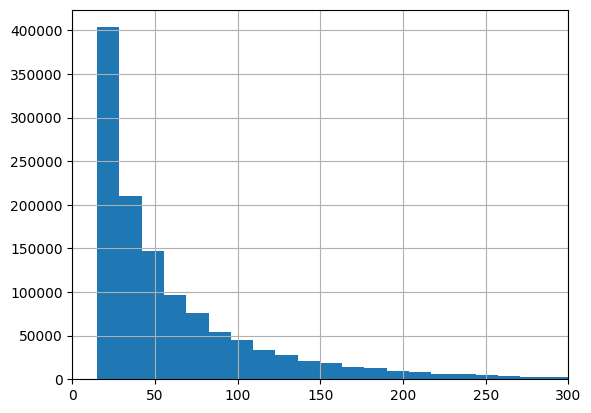

In [9]:
df[(df['DEP_DEL15']==1)].DEP_DELAY_NEW.hist(bins=200)
plt.xlim(0,300)

In [10]:
df.DEP_TIME_BLK.value_counts().sort_values
df.loc[(df['DEP_TIME_BLK']=='0600-0659') | (df['DEP_TIME_BLK']=='0700-0759'), 'DEP_TIME_BLK'] = '0600-0759'
df.loc[(df['DEP_TIME_BLK']=='0800-0859') | (df['DEP_TIME_BLK']=='0900-0959'), 'DEP_TIME_BLK'] = '0800-0959'
df.loc[(df['DEP_TIME_BLK']=='1000-1059') | (df['DEP_TIME_BLK']=='1100-1159'), 'DEP_TIME_BLK'] = '1000-1159'
df.loc[(df['DEP_TIME_BLK']=='1200-1259') | (df['DEP_TIME_BLK']=='1300-1359'), 'DEP_TIME_BLK'] = '1200-1359'
df.loc[(df['DEP_TIME_BLK']=='1400-1459') | (df['DEP_TIME_BLK']=='1500-1559'), 'DEP_TIME_BLK'] = '1400-1559'
df.loc[(df['DEP_TIME_BLK']=='1600-1659') | (df['DEP_TIME_BLK']=='1700-1759'), 'DEP_TIME_BLK'] = '1600-1759'
df.loc[(df['DEP_TIME_BLK']=='1800-1859') | (df['DEP_TIME_BLK']=='1900-1959'), 'DEP_TIME_BLK'] = '1800-1959'
df.loc[(df['DEP_TIME_BLK']=='2000-2059') | (df['DEP_TIME_BLK']=='2100-2159'), 'DEP_TIME_BLK'] = '2000-2159'
df.loc[(df['DEP_TIME_BLK']=='2200-2259') | (df['DEP_TIME_BLK']=='2300-2359'), 'DEP_TIME_BLK'] = '2200-2359'
df.DEP_TIME_BLK.value_counts().sort_values

<bound method Series.sort_values of 0600-0759    866436
0800-0959    848503
1000-1159    792635
1600-1759    777342
1400-1559    764221
1200-1359    751009
1800-1959    733031
2000-2159    563210
2200-2359    244095
0001-0559    148580
Name: DEP_TIME_BLK, dtype: int64>

(0.0, 4.0)

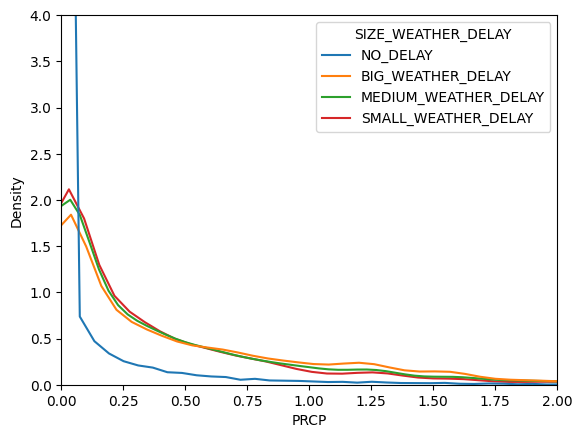

In [11]:
sns.kdeplot(
    df, x="PRCP", hue="SIZE_WEATHER_DELAY", common_norm=False,
)
plt.xlim(0,2)
plt.ylim(0,4)

<AxesSubplot: xlabel='AWND', ylabel='Density'>

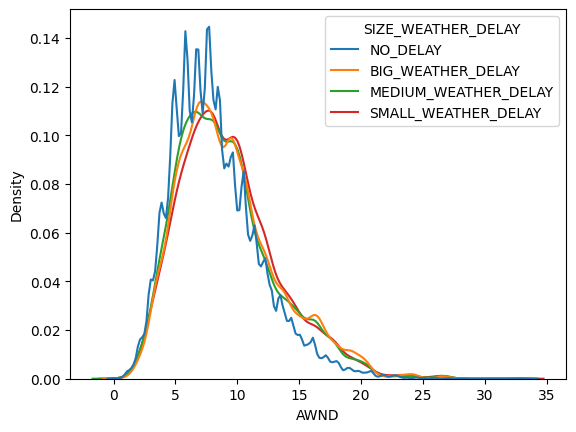

In [12]:
sns.kdeplot(
    df, x="AWND", hue="SIZE_WEATHER_DELAY", common_norm=False,
)

<AxesSubplot: xlabel='AWND', ylabel='Density'>

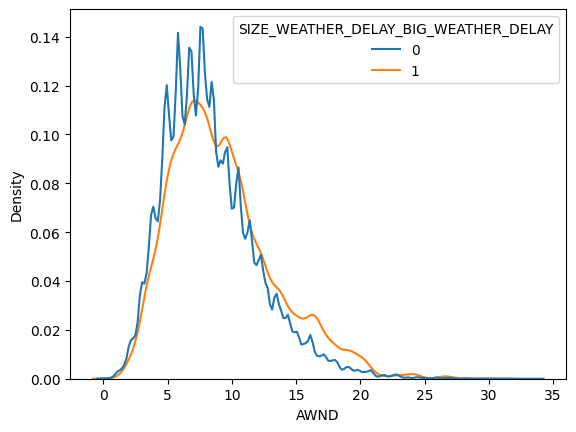

In [13]:
sns.kdeplot(
    df, x="AWND", hue="SIZE_WEATHER_DELAY_BIG_WEATHER_DELAY", common_norm=False,
)

## Airlines analysis

In [14]:
# The percentages depend of the amount of flights of each airline

rank_df = df.groupby(['SIZE_DELAY']).CARRIER_NAME.value_counts(normalize=True).rename('Percentages').reset_index()

rank_df['rank'] = rank_df.sort_values(['Percentages'], ascending=[False]) \
             .groupby(['SIZE_DELAY']) \
             .cumcount() + 1

rank_df.head()

,SIZE_DELAY,CARRIER_NAME,Percentages,rank
0,BIG_DELAY,Southwest Airlines Co.,0.150131,1
1,BIG_DELAY,American Airlines Inc.,0.146930,2
2,BIG_DELAY,United Air Lines Inc.,0.115083,3
3,BIG_DELAY,SkyWest Airlines Inc.,0.104921,4
4,BIG_DELAY,Delta Air Lines Inc.,0.099582,5


In [15]:
df_dumbbell_airlines = df.query("SIZE_DELAY != 'NO_DELAY'") \
    .groupby(['CARRIER_NAME']) \
    .SIZE_DELAY.value_counts(normalize=True) \
    .rename('Percentages').reset_index() \
    .sort_values(by=['CARRIER_NAME', 'Percentages'], ascending=[True,False])

df_dumbbell_airlines.loc[df_dumbbell_airlines['SIZE_DELAY'] == 'SMALL_DELAY', 'size_number'] = 1
df_dumbbell_airlines.loc[df_dumbbell_airlines['SIZE_DELAY'] == 'MEDIUM_DELAY', 'size_number'] = 3
df_dumbbell_airlines.loc[df_dumbbell_airlines['SIZE_DELAY'] == 'BIG_DELAY', 'size_number'] = 10

#plot

fig = px.scatter(df_dumbbell_airlines, \
    x="Percentages", y="CARRIER_NAME", color="SIZE_DELAY", size='size_number', \
    category_orders={ 
        "SIZE_DELAY": ['SMALL_DELAY', 'MEDIUM_DELAY', 'BIG_DELAY'], \
        "CARRIER_NAME": df_dumbbell_airlines[df_dumbbell_airlines['SIZE_DELAY']=='BIG_DELAY'].sort_values(by='Percentages').CARRIER_NAME.unique()
        },
height=800)

for i in df_dumbbell_airlines["CARRIER_NAME"].unique():

    df_sub = df_dumbbell_airlines[df_dumbbell_airlines["CARRIER_NAME"] == i]
    
    fig.add_shape(
        type="line",
        layer="below",

        y0=df_sub.CARRIER_NAME.values[0], x0=df_sub.Percentages.values[0],
        y1=df_sub.CARRIER_NAME.values[1], x1=df_sub.Percentages.values[1], 
    )

fig.update_layout(title_text='Distribution of Delays by Cause')

newnames = {'SMALL_DELAY':'Small Delay', 'MEDIUM_DELAY': 'Medium Delay', 'BIG_DELAY': 'Big Delay'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))

fig.show()

In [16]:
df_dumbbell_airlines = df \
    .groupby(['CARRIER_NAME']) \
    .SIZE_DELAY.value_counts(normalize=True) \
    .rename('Percentages').reset_index() \
    .sort_values(by=['CARRIER_NAME', 'Percentages'], ascending=[True,False])

df_dumbbell_airlines.loc[df_dumbbell_airlines['SIZE_DELAY'] == 'SMALL_DELAY', 'size_number'] = 1
df_dumbbell_airlines.loc[df_dumbbell_airlines['SIZE_DELAY'] == 'MEDIUM_DELAY', 'size_number'] = 3
df_dumbbell_airlines.loc[df_dumbbell_airlines['SIZE_DELAY'] == 'BIG_DELAY', 'size_number'] = 10

df_dumbbell_airlines = df_dumbbell_airlines.query("SIZE_DELAY != 'NO_DELAY'")
# plot 

fig = px.scatter(df_dumbbell_airlines, \
    x="Percentages", y="CARRIER_NAME", color="SIZE_DELAY", size='size_number', \
    category_orders={ 
        "SIZE_DELAY": ['SMALL_DELAY', 'MEDIUM_DELAY', 'BIG_DELAY'], \
        "CARRIER_NAME": df_dumbbell_airlines[df_dumbbell_airlines['SIZE_DELAY']=='BIG_DELAY'].sort_values(by='Percentages').CARRIER_NAME.unique()
        },
height=800)

for i in df_dumbbell_airlines["CARRIER_NAME"].unique():

    df_sub = df_dumbbell_airlines[df_dumbbell_airlines["CARRIER_NAME"] == i]
    
    fig.add_shape(
        type="line",
        layer="below",

        y0=df_sub.CARRIER_NAME.values[0], x0=df_sub.Percentages.values[0],
        y1=df_sub.CARRIER_NAME.values[1], x1=df_sub.Percentages.values[1], 
    )

fig.update_layout(title_text='Percentage of Delays by Cause from all Flights')

newnames = {'SMALL_DELAY':'Small Delay', 'MEDIUM_DELAY': 'Medium Delay', 'BIG_DELAY': 'Big Delay'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))

fig.show()

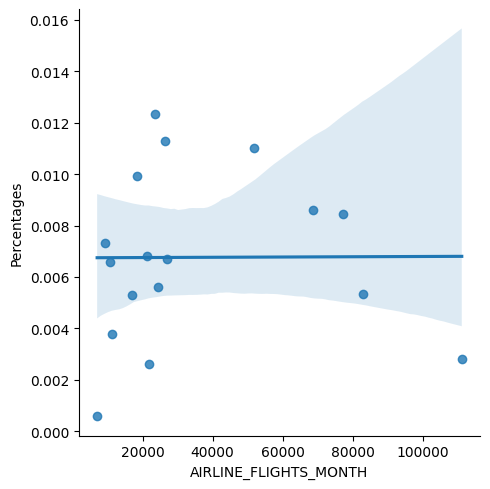

In [17]:
# Do airlines with a bigger perc of big delays have more flights per month?

df_lateaircraft_big_delay = df.groupby(['CARRIER_NAME']).SIZE_WEATHER_DELAY.value_counts(normalize=True) \
    .rename('Percentages').reset_index() \
    .sort_values(by=['CARRIER_NAME', 'Percentages'], ascending=[True,False])

df_airline_flights = (df_lateaircraft_big_delay[df_lateaircraft_big_delay['SIZE_WEATHER_DELAY']=='BIG_WEATHER_DELAY']
.merge(df.groupby('CARRIER_NAME').AIRLINE_FLIGHTS_MONTH.mean().reset_index(),
how='left'))

sns.lmplot(df_airline_flights, x='AIRLINE_FLIGHTS_MONTH', y='Percentages')

## Cause of delay distribution for each size of delay

In [18]:
carrier_df = df.groupby(['SIZE_DELAY']) \
        .CARRIER_DELAY.value_counts(normalize=True).rename('CARRIER_DELAY_PERC') \
        .reset_index() \
        .query("CARRIER_DELAY == 1").drop(columns='CARRIER_DELAY')

carrier_df = pd.melt(carrier_df, 
    id_vars='SIZE_DELAY', 
    value_vars=list(carrier_df.columns[1:]), 
    var_name='Delay Cause', 
    value_name='Percentage')


lateaircraft_df = df.groupby(['SIZE_DELAY']) \
        .LATE_AIRCRAFT_DELAY.value_counts(normalize=True).rename('LATEAIRCRAFT_DELAY_PERC') \
        .reset_index() \
        .query("LATE_AIRCRAFT_DELAY == 1").drop(columns='LATE_AIRCRAFT_DELAY')

lateaircraft_df = pd.melt(lateaircraft_df, 
    id_vars='SIZE_DELAY', 
    value_vars=list(lateaircraft_df.columns[1:]), 
    var_name='Delay Cause', 
    value_name='Percentage')


nas_df = df.groupby(['SIZE_DELAY']) \
        .NAS_DELAY.value_counts(normalize=True).rename('NAS_DELAY_PERC') \
        .reset_index() \
        .query("NAS_DELAY == 1").drop(columns='NAS_DELAY')

nas_df = pd.melt(nas_df, 
    id_vars='SIZE_DELAY', 
    value_vars=list(nas_df.columns[1:]), 
    var_name='Delay Cause', 
    value_name='Percentage')


weather_df = df.groupby(['SIZE_DELAY']) \
        .WEATHER_DELAY.value_counts(normalize=True).rename('WEATHER_DELAY_PERC') \
        .reset_index() \
        .query("WEATHER_DELAY == 1").drop(columns='WEATHER_DELAY')

weather_df = pd.melt(weather_df, 
    id_vars='SIZE_DELAY', 
    value_vars=list(weather_df.columns[1:]), 
    var_name='Delay Cause', 
    value_name='Percentage')

In [19]:
df_prov

,Delay,pct
0,Not delayed,0.81
1,Delayed,0.19


In [20]:
df_prov = pd.concat([lateaircraft_df, carrier_df, nas_df, weather_df])

df_prov.loc[df_prov.SIZE_DELAY=='BIG_DELAY', 'SIZE_DELAY'] = 'Big Delay'
df_prov.loc[df_prov.SIZE_DELAY=='MEDIUM_DELAY', 'SIZE_DELAY'] = 'Medium Delay'
df_prov.loc[df_prov.SIZE_DELAY=='SMALL_DELAY', 'SIZE_DELAY'] = 'Small Delay'

df_prov = df_prov.rename(columns={'SIZE_DELAY':'Size Delay'})

# plot

fig = px.bar(df_prov, x="Size Delay", 
            color=df_prov["Delay Cause"].map({"CARRIER_DELAY_PERC":"Carrier Delay","LATEAIRCRAFT_DELAY_PERC":"Late Aircraft Delay", \
                "NAS_DELAY_PERC":"NAS Delay", "WEATHER_DELAY_PERC":"Weather Delay"}),
            y='Percentage',
            title="Cause of Delay Distribution for Each Delay Size",
            barmode='group',
            height=700,
            category_orders={'SIZE_DELAY': df_prov.sort_values(by='Size Delay', ascending=False)["Size Delay"]}
            )

fig.show()

In [21]:
df.groupby(['DAY_OF_WEEK','SIZE_DELAY']) \
        .CARRIER_DELAY.value_counts(normalize=True).rename('CARRIER_DELAY_PERC') \
        .reset_index() \
        .query("CARRIER_DELAY == 1").drop(columns='CARRIER_DELAY') \
        .query("SIZE_DELAY == 'BIG_DELAY'")

,DAY_OF_WEEK,SIZE_DELAY,CARRIER_DELAY_PERC
0,1,BIG_DELAY,0.528735
7,2,BIG_DELAY,0.521346
14,3,BIG_DELAY,0.502036
21,4,BIG_DELAY,0.521647
28,5,BIG_DELAY,0.543740
35,6,BIG_DELAY,0.579312
42,7,BIG_DELAY,0.561897


In [22]:
time_la_delay = df.groupby(['DEP_TIME_BLK','SIZE_DELAY']) \
        .LATE_AIRCRAFT_DELAY.value_counts(normalize=True).rename('LATEAIRCRAFT_DELAY_PERC') \
        .reset_index() \
        .query("LATE_AIRCRAFT_DELAY == 1").drop(columns='LATE_AIRCRAFT_DELAY') \
        .query("SIZE_DELAY == 'BIG_DELAY'")

time_carrier_delay = df.groupby(['DEP_TIME_BLK','SIZE_DELAY']) \
        .CARRIER_DELAY.value_counts(normalize=True).rename('CARRIER_DELAY_PERC') \
        .reset_index() \
        .query("CARRIER_DELAY == 1").drop(columns='CARRIER_DELAY') \
        .query("SIZE_DELAY == 'BIG_DELAY'")

time_nas_delay = df.groupby(['DEP_TIME_BLK','SIZE_DELAY']) \
        .NAS_DELAY.value_counts(normalize=True).rename('NAS_DELAY_PERC') \
        .reset_index() \
        .query("NAS_DELAY == 1").drop(columns='NAS_DELAY') \
        .query("SIZE_DELAY == 'BIG_DELAY'")
        
time_weather_delay = df.groupby(['DEP_TIME_BLK','SIZE_DELAY']) \
        .WEATHER_DELAY.value_counts(normalize=True).rename('WEATHER_DELAY_PERC') \
        .reset_index() \
        .query("WEATHER_DELAY == 1").drop(columns='WEATHER_DELAY') \
        .query("SIZE_DELAY == 'BIG_DELAY'")

time_concurrent_flights = df.groupby(['DEP_TIME_BLK']).CONCURRENT_FLIGHTS.mean().reset_index()

# plot 

fig = px.bar(
    time_carrier_delay.merge(time_la_delay, how='inner').merge(time_nas_delay, how='inner').merge(time_weather_delay), 
    x="DEP_TIME_BLK", y=["CARRIER_DELAY_PERC", "LATEAIRCRAFT_DELAY_PERC", 'NAS_DELAY_PERC', 'WEATHER_DELAY_PERC'], 
    title="Percentage of big delays by time slot and cause")
    
fig.update_layout(barmode='group')

In [23]:
# Hacer esto por Region
df_prov = df[df['DEP_DEL15']==1].groupby(['DEP_TIME_BLK']).LATE_AIRCRAFT_DELAY.mean().reset_index() \
    .merge(df[df['DEP_DEL15']==1].groupby(['DEP_TIME_BLK']).CARRIER_DELAY.mean().reset_index()) \
    .merge(df[df['DEP_DEL15']==1].groupby(['DEP_TIME_BLK']).NAS_DELAY.mean().reset_index()) \
    .merge(df[df['DEP_DEL15']==1].groupby(['DEP_TIME_BLK']).WEATHER_DELAY.mean().reset_index())

fig = px.bar(
    df_prov, x="DEP_TIME_BLK", y=["CARRIER_DELAY", "LATE_AIRCRAFT_DELAY", 'NAS_DELAY', 'WEATHER_DELAY'], 
    title="Percentage of delays by time slot and cause"
)

fig.update_layout(barmode='group')

In [24]:
print(df[df['LATE_AIRCRAFT_DELAY']==1].CARRIER_DELAY.value_counts(normalize=True))
print(df[df['LATE_AIRCRAFT_DELAY']==1].WEATHER_DELAY.value_counts(normalize=True))

0.0    0.512087
1.0    0.487913
Name: CARRIER_DELAY, dtype: float64
0.0    0.9452
1.0    0.0548
Name: WEATHER_DELAY, dtype: float64


In [25]:
print(df[df['CARRIER_DELAY']==1].LATE_AIRCRAFT_DELAY.value_counts(normalize=True))
print(df[df['CARRIER_DELAY']==1].WEATHER_DELAY.value_counts(normalize=True))

1.0    0.53054
0.0    0.46946
Name: LATE_AIRCRAFT_DELAY, dtype: float64
0.0    0.994637
1.0    0.005363
Name: WEATHER_DELAY, dtype: float64


In [26]:
print(df[df['WEATHER_DELAY']==1].LATE_AIRCRAFT_DELAY.value_counts(normalize=True))
print(df[df['WEATHER_DELAY']==1].CARRIER_DELAY.value_counts(normalize=True))

1.0    0.513957
0.0    0.486043
Name: LATE_AIRCRAFT_DELAY, dtype: float64
0.0    0.953747
1.0    0.046253
Name: CARRIER_DELAY, dtype: float64


## Proporción promedio de las causas más comunes de delay según tamaño de delay para las aeorlineas

In [27]:
def perc_delays(size_delay):

    carrier_delay_perc = df.query(f"SIZE_DELAY == '{size_delay}'")  \
        .groupby(['CARRIER_NAME']) \
        .CARRIER_DELAY.value_counts(normalize=True).rename('CARRIER_DELAY_PERC') \
        .reset_index() \
        .query("CARRIER_DELAY == 1").drop(columns='CARRIER_DELAY')

    lateairc_delay_perc = df.query(f"SIZE_DELAY == '{size_delay}'")  \
        .groupby(['CARRIER_NAME']) \
        .LATE_AIRCRAFT_DELAY.value_counts(normalize=True).rename('LATEAIRCRAFT_DELAY_PERC') \
        .reset_index() \
        .query("LATE_AIRCRAFT_DELAY == 1").drop(columns='LATE_AIRCRAFT_DELAY')

    security_delay_perc = df.query(f"SIZE_DELAY == '{size_delay}'")  \
        .groupby(['CARRIER_NAME']) \
        .SECURITY_DELAY.value_counts(normalize=True).rename('SECURITY_DELAY_PERC') \
        .reset_index() \
        .query("SECURITY_DELAY == 1").drop(columns='SECURITY_DELAY')

    nas_delay_perc = df.query(f"SIZE_DELAY == '{size_delay}'")  \
        .groupby(['CARRIER_NAME']) \
        .NAS_DELAY.value_counts(normalize=True).rename('NAS_DELAY_PERC') \
        .reset_index() \
        .query("NAS_DELAY == 1").drop(columns='NAS_DELAY')

    weather_delay_perc = df.query(f"SIZE_DELAY == '{size_delay}'")  \
        .groupby(['CARRIER_NAME']) \
        .WEATHER_DELAY.value_counts(normalize=True).rename('WEATHER_DELAY_PERC') \
        .reset_index() \
        .query("WEATHER_DELAY == 1").drop(columns='WEATHER_DELAY')

    return carrier_delay_perc, lateairc_delay_perc, security_delay_perc, nas_delay_perc, weather_delay_perc

In [28]:
carrier_delay_perc, lateairc_delay_perc, security_delay_perc, nas_delay_perc, weather_delay_perc = perc_delays('BIG_DELAY')

df_dumbbell_airlines.query("SIZE_DELAY == 'BIG_DELAY'") \
    .merge( 
    carrier_delay_perc.merge(lateairc_delay_perc, how='outer') \
    .merge(security_delay_perc, how='outer') \
    .merge(nas_delay_perc, how='outer') \
    .merge(weather_delay_perc, how='outer') 
    , how='left').drop(columns=['SIZE_DELAY', 'size_number']).fillna(0).mean(axis=0, numeric_only=True)

Percentages                0.070856
CARRIER_DELAY_PERC         0.526764
LATEAIRCRAFT_DELAY_PERC    0.611924
SECURITY_DELAY_PERC        0.004456
NAS_DELAY_PERC             0.400151
WEATHER_DELAY_PERC         0.079372
dtype: float64

In [29]:
carrier_delay_perc, lateairc_delay_perc, security_delay_perc, nas_delay_perc, weather_delay_perc = perc_delays('MEDIUM_DELAY')

df_dumbbell_airlines.query("SIZE_DELAY == 'MEDIUM_DELAY'") \
    .merge( 
    carrier_delay_perc.merge(lateairc_delay_perc, how='outer') \
    .merge(security_delay_perc, how='outer') \
    .merge(nas_delay_perc, how='outer') \
    .merge(weather_delay_perc, how='outer') 
    , how='left').drop(columns=['SIZE_DELAY', 'size_number']).fillna(0).mean(axis=0, numeric_only=True)

Percentages                0.054722
CARRIER_DELAY_PERC         0.504215
LATEAIRCRAFT_DELAY_PERC    0.555483
SECURITY_DELAY_PERC        0.003965
NAS_DELAY_PERC             0.360616
WEATHER_DELAY_PERC         0.054419
dtype: float64

In [30]:
carrier_delay_perc, lateairc_delay_perc, security_delay_perc, nas_delay_perc, weather_delay_perc = perc_delays('SMALL_DELAY')

df_dumbbell_airlines.query("SIZE_DELAY == 'SMALL_DELAY'") \
    .merge( 
    carrier_delay_perc.merge(lateairc_delay_perc, how='outer') \
    .merge(security_delay_perc, how='outer') \
    .merge(nas_delay_perc, how='outer') \
    .merge(weather_delay_perc, how='outer') 
    , how='left').drop(columns=['SIZE_DELAY', 'size_number']).fillna(0).mean(axis=0, numeric_only=True)

Percentages                0.063461
CARRIER_DELAY_PERC         0.305341
LATEAIRCRAFT_DELAY_PERC    0.285792
SECURITY_DELAY_PERC        0.002889
NAS_DELAY_PERC             0.294704
WEATHER_DELAY_PERC         0.031830
dtype: float64

In [31]:
df.groupby('SIZE_DELAY').CONCURRENT_FLIGHTS.mean()

SIZE_DELAY
BIG_DELAY       28.006680
MEDIUM_DELAY    28.442470
NO_DELAY        27.742964
SMALL_DELAY     28.296569
Name: CONCURRENT_FLIGHTS, dtype: float64

In [32]:
df[df['LATE_AIRCRAFT_DELAY']==1].groupby('SIZE_DELAY').CONCURRENT_FLIGHTS.mean()

SIZE_DELAY
BIG_DELAY       27.753152
MEDIUM_DELAY    27.325996
SMALL_DELAY     27.533864
Name: CONCURRENT_FLIGHTS, dtype: float64

In [33]:
df[(df['LATE_AIRCRAFT_DELAY']==1) | (df['SIZE_DELAY']=='NO_DELAY')].groupby('SIZE_DELAY').DISTANCE.mean()

SIZE_DELAY
BIG_DELAY       812.121953
MEDIUM_DELAY    789.993399
NO_DELAY        832.654497
SMALL_DELAY     754.454009
Name: DISTANCE, dtype: float64

<AxesSubplot: xlabel='PRCP', ylabel='SIZE_DELAY'>

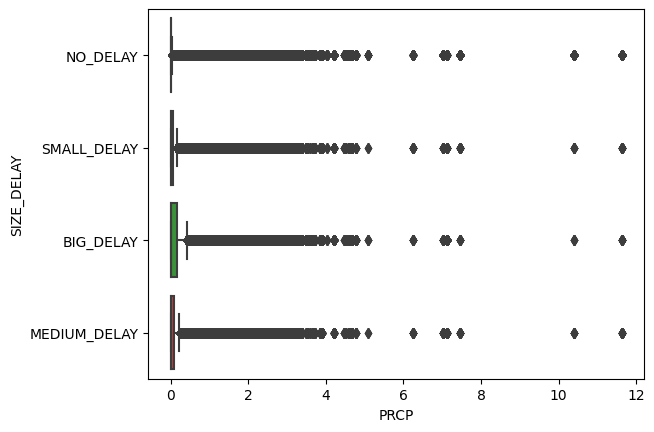

In [34]:
sns.boxplot(data=df, x="PRCP", y="SIZE_DELAY")

## States by zone

In [24]:
# Add States
geolocator = Nominatim(user_agent="http")

airports = df[['DEPARTING_AIRPORT', 'LATITUDE', 'LONGITUDE']].drop_duplicates().reset_index(drop=True)
airports_col = airports.apply(lambda col: geolocator.reverse((col.LATITUDE, col.LONGITUDE)).raw['address']['ISO3166-2-lvl4'][-2:], axis=1)

airports = airports.reset_index(drop=True)
airports['state'] = airports_col
df = df.merge(airports[['DEPARTING_AIRPORT', 'state']], on='DEPARTING_AIRPORT')

In [25]:
df = df.merge(pd.read_csv('us census bureau regions and divisions.csv')[['State Code', 'Region']], 
    left_on='state', right_on='State Code', how='left') \
    .drop(columns='State Code')

In [37]:
df.groupby(['Region','SIZE_WEATHER_DELAY']).PRCP.median()

Region     SIZE_WEATHER_DELAY  
Midwest    BIG_WEATHER_DELAY       0.18
           MEDIUM_WEATHER_DELAY    0.12
           NO_DELAY                0.00
           SMALL_WEATHER_DELAY     0.12
Northeast  BIG_WEATHER_DELAY       0.38
           MEDIUM_WEATHER_DELAY    0.32
           NO_DELAY                0.00
           SMALL_WEATHER_DELAY     0.29
South      BIG_WEATHER_DELAY       0.32
           MEDIUM_WEATHER_DELAY    0.25
           NO_DELAY                0.00
           SMALL_WEATHER_DELAY     0.21
West       BIG_WEATHER_DELAY       0.10
           MEDIUM_WEATHER_DELAY    0.07
           NO_DELAY                0.00
           SMALL_WEATHER_DELAY     0.03
Name: PRCP, dtype: float64

In [38]:
weather_delay_prcp = df \
    .groupby(['Region','MONTH','SIZE_WEATHER_DELAY']).PRCP.median().reset_index()

# plot 

fig = px.line(weather_delay_prcp, x="MONTH", y="PRCP", color='SIZE_WEATHER_DELAY', title='', facet_row = 'Region', height=800)
fig.show()

In [39]:
weather_delay_prcp = df \
    .groupby(['Region','MONTH','WEATHER_DELAY'])['PRCP'].quantile(0.5).reset_index()

# plot 

fig = px.line(weather_delay_prcp, x="MONTH", y="PRCP", color='WEATHER_DELAY', title='', facet_row = 'Region', height=800)
fig.show()

In [40]:
# Do flights with two or more flags more delayed?

df['number_delays'] = df[['LATE_AIRCRAFT_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY']].sum(axis=1)

# sns.violinplot(data=df[df['DEP_DEL15']==1], x='number_delays', y='DEP_DELAY_NEW')
# plt.show()

df[df['DEP_DEL15']==1].groupby('number_delays').SIZE_DELAY.value_counts(normalize=True)

number_delays  SIZE_DELAY  
0.0            SMALL_DELAY     0.901969
               MEDIUM_DELAY    0.088097
               BIG_DELAY       0.009934
1.0            BIG_DELAY       0.439042
               MEDIUM_DELAY    0.375546
               SMALL_DELAY     0.185412
2.0            BIG_DELAY       0.427620
               MEDIUM_DELAY    0.328221
               SMALL_DELAY     0.244159
3.0            BIG_DELAY       0.429004
               MEDIUM_DELAY    0.290528
               SMALL_DELAY     0.280468
4.0            BIG_DELAY       0.650869
               MEDIUM_DELAY    0.235387
               SMALL_DELAY     0.113744
Name: SIZE_DELAY, dtype: float64

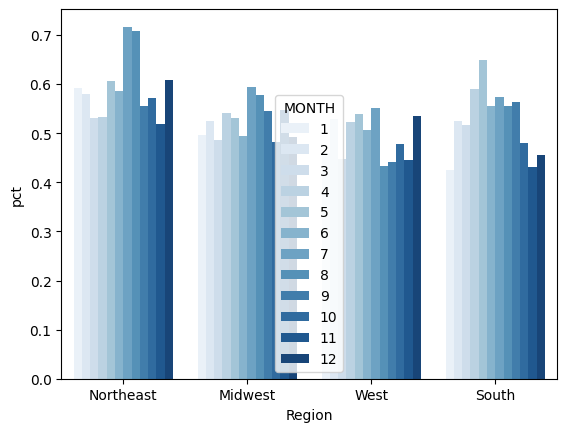

In [41]:
# qué porcentaje de sus weather delays son big delays
df_prov = df[df['SIZE_WEATHER_DELAY']!='NO_DELAY'].groupby(['MONTH','Region']) \
			.SIZE_WEATHER_DELAY.value_counts(normalize=True) \
			.rename('pct').reset_index() \
			.sort_values(by=['MONTH', 'SIZE_WEATHER_DELAY', 'pct'], ascending=[True,True,False]) \
			.query("SIZE_WEATHER_DELAY == 'BIG_WEATHER_DELAY'")#.query("MONTH in [1,2,3,4,5,6]")

sns.barplot(x = 'Region',
			y = 'pct',
			hue = 'MONTH',
			data = df_prov,
			palette = "Blues")

plt.show()


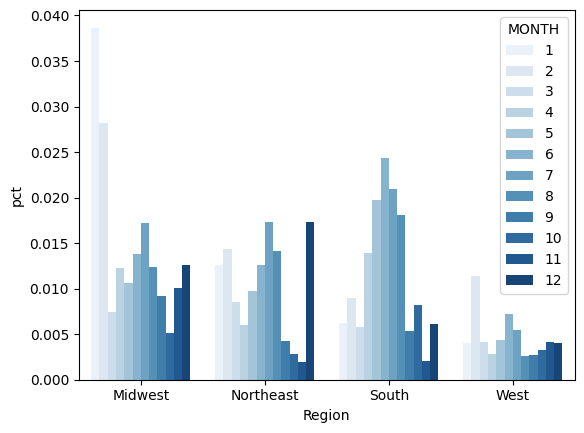

In [42]:
# qué porcentaje de los aviones que parten desde esa región tienen big weather delays
df_prov = df.groupby(['MONTH','Region']) \
			.WEATHER_DELAY.mean() \
			.rename('pct').reset_index() \

sns.barplot(x = 'Region',
			y = 'pct',
			hue = 'MONTH',
			data = df_prov,
			palette = "Blues")

plt.show()

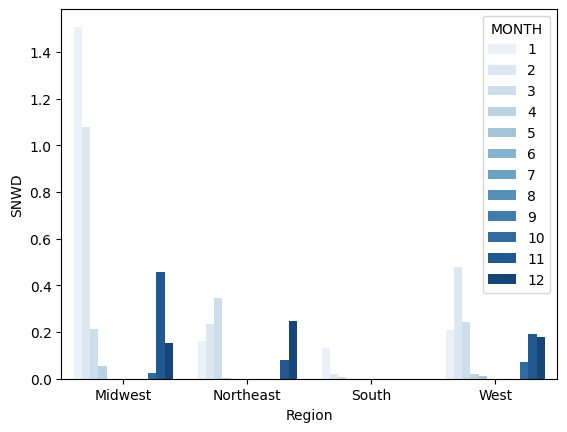

In [43]:
df_prov = df.groupby(['MONTH','Region']) \
			.SNWD.mean().reset_index() \

sns.barplot(x = 'Region',
			y = 'SNWD',
			hue = 'MONTH',
			data = df_prov,
			palette = "Blues")

plt.show()

In [44]:
df.groupby(['Region','SIZE_DELAY']) \
        .WEATHER_DELAY.value_counts(normalize=True).rename('WEATHER_DELAY_PERC') \
        .reset_index() \
        .query("WEATHER_DELAY == 1").drop(columns='WEATHER_DELAY')

,Region,SIZE_DELAY,WEATHER_DELAY_PERC
1,Midwest,BIG_DELAY,0.110601
3,Midwest,MEDIUM_DELAY,0.071166
6,Midwest,SMALL_DELAY,0.041929
8,Northeast,BIG_DELAY,0.073205
10,Northeast,MEDIUM_DELAY,0.041389
13,Northeast,SMALL_DELAY,0.023572
15,South,BIG_DELAY,0.098681
17,South,MEDIUM_DELAY,0.060536
20,South,SMALL_DELAY,0.026716
22,West,BIG_DELAY,0.042349


In [45]:
df.groupby(['Region','SIZE_DELAY']) \
        .CARRIER_DELAY.value_counts(normalize=True).rename('CARRIER_DELAY_PERC') \
        .reset_index() \
        .query("CARRIER_DELAY == 1").drop(columns='CARRIER_DELAY')

,Region,SIZE_DELAY,CARRIER_DELAY_PERC
0,Midwest,BIG_DELAY,0.508563
2,Midwest,MEDIUM_DELAY,0.509355
6,Midwest,SMALL_DELAY,0.281082
7,Northeast,BIG_DELAY,0.543739
9,Northeast,MEDIUM_DELAY,0.512868
13,Northeast,SMALL_DELAY,0.280303
14,South,BIG_DELAY,0.533923
16,South,MEDIUM_DELAY,0.564507
20,South,SMALL_DELAY,0.319216
21,West,BIG_DELAY,0.552196


In [46]:
df.groupby(['Region','SIZE_DELAY']) \
        .LATE_AIRCRAFT_DELAY.value_counts(normalize=True).rename('LATEAIRCRAFT_DELAY_PERC') \
        .reset_index() \
        .query("LATE_AIRCRAFT_DELAY == 1").drop(columns='LATE_AIRCRAFT_DELAY')

,Region,SIZE_DELAY,LATEAIRCRAFT_DELAY_PERC
0,Midwest,BIG_DELAY,0.619030
2,Midwest,MEDIUM_DELAY,0.571312
6,Midwest,SMALL_DELAY,0.269792
7,Northeast,BIG_DELAY,0.689364
9,Northeast,MEDIUM_DELAY,0.589706
13,Northeast,SMALL_DELAY,0.265628
14,South,BIG_DELAY,0.634366
16,South,MEDIUM_DELAY,0.578886
20,South,SMALL_DELAY,0.273508
21,West,BIG_DELAY,0.638708


In [47]:
df.groupby(['Region','SIZE_DELAY']) \
        .NAS_DELAY.value_counts(normalize=True).rename('NAS_DELAY_PERC') \
        .reset_index() \
        .query("NAS_DELAY == 1").drop(columns='NAS_DELAY')

,Region,SIZE_DELAY,NAS_DELAY_PERC
1,Midwest,BIG_DELAY,0.418418
3,Midwest,MEDIUM_DELAY,0.356367
6,Midwest,SMALL_DELAY,0.286727
8,Northeast,BIG_DELAY,0.433106
10,Northeast,MEDIUM_DELAY,0.384865
13,Northeast,SMALL_DELAY,0.312329
15,South,BIG_DELAY,0.378747
17,South,MEDIUM_DELAY,0.325942
20,South,SMALL_DELAY,0.265569
22,West,BIG_DELAY,0.353387


In [48]:
df_prov = df.merge(
            df[['DEPARTING_AIRPORT', 'Region']].rename(columns={'DEPARTING_AIRPORT':'PREVIOUS_AIRPORT', 'Region':'region_prev_airport'})\
            .drop_duplicates(subset='PREVIOUS_AIRPORT'),\
            on='PREVIOUS_AIRPORT', how='inner'
)

print(df_prov.groupby('Region')['region_prev_airport'].value_counts(normalize=True),'\n')

Region     region_prev_airport
Midwest    South                  0.405644
           Midwest                0.251213
           Northeast              0.172596
           West                   0.170547
Northeast  South                  0.515294
           Midwest                0.211200
           Northeast              0.187693
           West                   0.085813
South      South                  0.524611
           Northeast              0.178821
           Midwest                0.171191
           West                   0.125376
West       West                   0.625805
           South                  0.198795
           Midwest                0.112565
           Northeast              0.062834
Name: region_prev_airport, dtype: float64 



In [49]:
px.line(df.drop_duplicates(subset=['MONTH','CARRIER_NAME']), x='MONTH', y='AIRLINE_FLIGHTS_MONTH', \
    color='CARRIER_NAME')

In [50]:
df_prov = df.groupby(['MONTH','CARRIER_NAME']).AIRLINE_FLIGHTS_MONTH.mean().reset_index().sort_values(by='MONTH').reset_index(drop=True)

px.line(df.drop_duplicates(subset=['MONTH','CARRIER_NAME']), x='MONTH', y='AIRLINE_FLIGHTS_MONTH', \
    color='CARRIER_NAME')

In [51]:
df

,MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,SIZE_CARRIER_DELAY_BIG_CARRIER_DELAY,SIZE_CARRIER_DELAY_MEDIUM_CARRIER_DELAY,SIZE_CARRIER_DELAY_NO_DELAY,SIZE_CARRIER_DELAY_SMALL_CARRIER_DELAY,SIZE_WEATHER_DELAY_BIG_WEATHER_DELAY,SIZE_WEATHER_DELAY_MEDIUM_WEATHER_DELAY,SIZE_WEATHER_DELAY_NO_DELAY,SIZE_WEATHER_DELAY_SMALL_WEATHER_DELAY,SIZE_LATE_AIRCRAFT_DELAY_BIG_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_MEDIUM_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_NO_DELAY,SIZE_LATE_AIRCRAFT_DELAY_SMALL_LATE_AIRCRAFT_DELAY,SIZE_NAS_DELAY_BIG_NAS_DELAY,SIZE_NAS_DELAY_MEDIUM_NAS_DELAY,SIZE_NAS_DELAY_NO_DELAY,SIZE_NAS_DELAY_SMALL_NAS_DELAY,SIZE_DELAY_BIG_DELAY,SIZE_DELAY_MEDIUM_DELAY,SIZE_DELAY_NO_DELAY,SIZE_DELAY_SMALL_DELAY,SIZE_CARRIER_DELAY,SIZE_WEATHER_DELAY,SIZE_LATE_AIRCRAFT_DELAY,SIZE_NAS_DELAY,SIZE_DELAY,state,Region,number_delays
0,1,7,0.0,0,0800-0959,258.0,2,0.0,0.0,0.0,0.0,0.0,1,25,143,Southwest Airlines Co.,13056,107363,5873,1903352,13382999,0.000062,0.000099,8,McCarran International,36.08,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NV,West,0.0
1,1,7,0.0,0,0600-0759,1747.0,7,0.0,0.0,0.0,0.0,0.0,1,29,191,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,3,McCarran International,36.08,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NV,West,0.0
2,1,7,0.0,0,0600-0759,1747.0,7,0.0,0.0,0.0,0.0,0.0,1,27,199,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,18,McCarran International,36.08,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NV,West,0.0
3,1,7,0.0,0,0600-0759,2248.0,9,0.0,0.0,0.0,0.0,0.0,1,27,180,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,2,McCarran International,36.08,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NV,West,0.0
4,1,7,0.0,0,0001-0559,1514.0,7,0.0,0.0,0.0,0.0,0.0,1,10,182,Spirit Air Lines,13056,15023,1257,1903352,2688839,0.000009,0.000125,1,McCarran International,36.08,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NV,West,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489057,12,6,0.0,0,1400-1559,1175.0,5,0.0,0.0,0.0,0.0,0.0,5,1,157,Delta Air Lines Inc.,1154,81498,198,162026,12460183,0.000144,0.000149,29,Spokane International,47.62,-117.533,Minneapolis-St Paul International,0.01,0.0,0.0,54.0,10.74,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,WA,West,0.0
6489058,12,6,14.0,0,1600-1759,742.0,3,0.0,0.0,0.0,0.0,0.0,6,2,143,Southwest Airlines Co.,1154,113248,324,162026,13382999,0.000062,0.000099,19,Spokane International,47.62,-117.533,Metropolitan Oakland International,0.01,0.0,0.0,54.0,10.74,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,WA,West,0.0
6489059,12,6,9.0,0,1800-1959,806.0,4,0.0,0.0,0.0,0.0,0.0,7,2,143,Southwest Airlines Co.,1154,113248,324,162026,13382999,0.000062,0.000099,9,Spokane International,47.62,-117.533,Stapleton International,0.01,0.0,0.0,54.0,10.74,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,NO_DELAY,WA,West,0.0
6489060,

In [16]:
top_delayed_airlines = df.groupby(['CARRIER_NAME']).DEP_DEL15.mean().reset_index().sort_values(by='DEP_DEL15').tail(5)

df_prov = df[df['CARRIER_NAME'].isin(top_delayed_airlines.CARRIER_NAME.unique())] \
    .groupby(['MONTH','CARRIER_NAME']).DEP_DEL15.mean().reset_index() \
    .sort_values(by='DEP_DEL15').sort_values(by='MONTH').reset_index(drop=True)

px.line(df_prov, x='MONTH', y='DEP_DEL15', \
    color='CARRIER_NAME')

In [18]:
least_delayed_airlines = df.groupby(['CARRIER_NAME']).DEP_DEL15.mean().reset_index().sort_values(by='DEP_DEL15').head(5)

df_prov = df[df['CARRIER_NAME'].isin(least_delayed_airlines.CARRIER_NAME.unique())] \
    .groupby(['MONTH','CARRIER_NAME']).DEP_DEL15.mean().reset_index() \
    .sort_values(by='DEP_DEL15').sort_values(by='MONTH').reset_index(drop=True)

px.line(df_prov, x='MONTH', y='DEP_DEL15', \
    color='CARRIER_NAME')

In [7]:
# Are more delayed airlines traveling more within the rainiest regions?

In [8]:
prov_top = df[df['CARRIER_NAME'].isin(top_delayed_airlines.CARRIER_NAME.unique())] \
    .groupby(['CARRIER_NAME']).Region.value_counts(normalize=True) \
    .rename('pct').reset_index()

AttributeError: 'DataFrameGroupBy' object has no attribute 'Region'

In [ ]:
prov_least = df[df['CARRIER_NAME'].isin(least_delayed_airlines.CARRIER_NAME.unique())] \
    .groupby(['CARRIER_NAME']).Region.value_counts(normalize=True) \
    .rename('pct').reset_index()

In [ ]:
fig = px.bar(
    pd.pivot_table(prov_least, values='pct', index=['CARRIER_NAME'],
                    columns=['Region'], aggfunc=np.mean, fill_value=0).reset_index() \
                    [['CARRIER_NAME', 'West', "Midwest", "Northeast", 'South']], 
    x="CARRIER_NAME", y=['West',"Midwest", "Northeast", 'South'], 
    title="Perce"
)

fig.update_layout(barmode='group')
fig.update_yaxes(range=[0, 1])  

In [ ]:
fig = px.bar(
    pd.pivot_table(prov_top, values='pct', index=['CARRIER_NAME'],
                    columns=['Region'], aggfunc=np.mean, fill_value=0).reset_index() \
                    [['CARRIER_NAME', 'West', "Midwest", "Northeast", 'South']], 
    x="CARRIER_NAME", y=['West',"Midwest", "Northeast", 'South'], 
    title="Perce"
)

fig.update_layout(barmode='group')
fig.update_yaxes(range=[0, 1])  

In [ ]:
df.groupby(['CARRIER_NAME'])[['DEP_DEL15', 'AIRLINE_AIRPORT_FLIGHTS_MONTH']].mean().reset_index().sort_values(by='DEP_DEL15')


,CARRIER_NAME,DEP_DEL15,AIRLINE_AIRPORT_FLIGHTS_MONTH
9,Hawaiian Airlines Inc.,0.087065,1764.849368
6,Delta Air Lines Inc.,0.146386,6899.871593
12,"Midwest Airline, Inc.",0.163793,1270.169060
0,Alaska Airlines Inc.,0.164692,2308.134187
7,Endeavor Air Inc.,0.174859,1389.709435
13,SkyWest Airlines Inc.,0.178232,2475.750224
3,American Eagle Airlines Inc.,0.179871,3015.862045
15,Spirit Air Lines,0.187864,827.257614
1,Allegiant Air,0.189324,318.290576
11,Mesa Airlines Inc.,0.194398,1726.766520


In [ ]:
fig = px.line(

    df[df['CARRIER_NAME'].isin(least_delayed_airlines.CARRIER_NAME.unique())] \
    .groupby(['CARRIER_NAME', 'MONTH']).AIRLINE_FLIGHTS_MONTH.mean().rename('count').reset_index(),

    color="CARRIER_NAME", y='count', x='MONTH',
    title="Perce"
)

fig.update_layout(barmode='group')
fig.update_yaxes(range=[0, 120000])  

In [ ]:
fig = px.line(

    df[df['CARRIER_NAME'].isin(top_delayed_airlines.CARRIER_NAME.unique())] \
    .groupby(['CARRIER_NAME', 'MONTH']).AIRLINE_FLIGHTS_MONTH.mean().rename('count').reset_index(),

    color="CARRIER_NAME", y='count', x='MONTH',
    title="Perce"
)

fig.update_layout(barmode='group')
fig.update_yaxes(range=[0, 120000])  

In [ ]:
# por aerolinea tipos de delays
# aerolineas con más big delays

In [19]:
df[( df['CARRIER_NAME'].isin(top_delayed_airlines.CARRIER_NAME.unique()) ) & (df['DEP_DEL15']==1)] \
    .groupby('CARRIER_NAME').NAS_DELAY.value_counts(normalize=True) \
    .rename('pct').reset_index().query('NAS_DELAY == 1').mean()

/var/folders/mr/00bdgfv15z96v_xlq0mdz5pc0000gn/T/ipykernel_2333/448093998.py:3: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



NAS_DELAY    1.000000
pct          0.351892
dtype: float64

In [20]:
df[( df['CARRIER_NAME'].isin(least_delayed_airlines.CARRIER_NAME.unique()) ) & (df['DEP_DEL15']==1)] \
    .groupby('CARRIER_NAME').NAS_DELAY.value_counts(normalize=True) \
    .rename('pct').reset_index().query('NAS_DELAY == 1').mean()

/var/folders/mr/00bdgfv15z96v_xlq0mdz5pc0000gn/T/ipykernel_2333/1484866195.py:3: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



NAS_DELAY    1.000000
pct          0.316886
dtype: float64

In [21]:
df[( df['CARRIER_NAME'].isin(top_delayed_airlines.CARRIER_NAME.unique()) ) & (df['DEP_DEL15']==1)] \
    .groupby('CARRIER_NAME').CARRIER_DELAY.value_counts(normalize=True) \
    .rename('pct').reset_index().query('CARRIER_DELAY == 1').mean()

/var/folders/mr/00bdgfv15z96v_xlq0mdz5pc0000gn/T/ipykernel_2333/4080703614.py:3: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



CARRIER_DELAY    1.000000
pct              0.499434
dtype: float64

In [22]:
df[( df['CARRIER_NAME'].isin(least_delayed_airlines.CARRIER_NAME.unique()) ) & (df['DEP_DEL15']==1)] \
    .groupby('CARRIER_NAME').CARRIER_DELAY.value_counts(normalize=True) \
    .rename('pct').reset_index().query('CARRIER_DELAY == 1').mean()

/var/folders/mr/00bdgfv15z96v_xlq0mdz5pc0000gn/T/ipykernel_2333/573649437.py:3: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



CARRIER_DELAY    1.000000
pct              0.434345
dtype: float64

### South

In [26]:
test = df[ (df['DEP_DEL15']==1)] \
    .groupby(['CARRIER_NAME', 'Region']).DEP_DEL15.value_counts(normalize=False) \
    .rename('count').reset_index().query('DEP_DEL15 == 1') 

test['pct'] = test['count'] / test.groupby('CARRIER_NAME')['count'].transform('sum')

test

,CARRIER_NAME,Region,DEP_DEL15,count,pct
0,Alaska Airlines Inc.,Midwest,1,1375,0.034883
1,Alaska Airlines Inc.,Northeast,1,2586,0.065606
2,Alaska Airlines Inc.,South,1,3142,0.079712
3,Alaska Airlines Inc.,West,1,32314,0.819799
4,Allegiant Air,Midwest,1,1098,0.136026
...,...,...,...,...,...
59,Spirit Air Lines,West,1,6872,0.193131
60,United Air Lines Inc.,Midwest,1,20261,0.172482
61,United Air Lines Inc.,Northeast,1,21377,0.181983
62,United Air Lines Inc.,South,1,33017,0.281075


In [27]:
test[ test['CARRIER_NAME'].isin(least_delayed_airlines.CARRIER_NAME.unique()) ] \
    .query("Region == 'South'")

,CARRIER_NAME,Region,DEP_DEL15,count,pct
2,Alaska Airlines Inc.,South,1,3142,0.079712
25,Delta Air Lines Inc.,South,1,63321,0.460982
29,Endeavor Air Inc.,South,1,15049,0.422238
46,"Midwest Airline, Inc.",South,1,18098,0.368122


In [28]:
test[ test['CARRIER_NAME'].isin(top_delayed_airlines.CARRIER_NAME.unique()) ] \
    .query("Region == 'South'")

,CARRIER_NAME,Region,DEP_DEL15,count,pct
10,American Airlines Inc.,South,1,99684,0.549680
18,Atlantic Southeast Airlines,South,1,10712,0.465658
32,Frontier Airlines Inc.,South,1,11896,0.377232
38,JetBlue Airways,South,1,27692,0.404458
54,Southwest Airlines Co.,South,1,107908,0.397778


### Northeast

In [29]:
test[ test['CARRIER_NAME'].isin(least_delayed_airlines.CARRIER_NAME.unique()) ] \
    .query("Region == 'Northeast'")

,CARRIER_NAME,Region,DEP_DEL15,count,pct
1,Alaska Airlines Inc.,Northeast,1,2586,0.065606
24,Delta Air Lines Inc.,Northeast,1,19174,0.139588
28,Endeavor Air Inc.,Northeast,1,12993,0.364552
34,Hawaiian Airlines Inc.,Northeast,1,69,0.010581
45,"Midwest Airline, Inc.",Northeast,1,18781,0.382015


In [30]:
test[ test['CARRIER_NAME'].isin(top_delayed_airlines.CARRIER_NAME.unique()) ] \
    .query("Region == 'Northeast'")

,CARRIER_NAME,Region,DEP_DEL15,count,pct
9,American Airlines Inc.,Northeast,1,23517,0.129678
17,Atlantic Southeast Airlines,Northeast,1,5361,0.233046
31,Frontier Airlines Inc.,Northeast,1,2948,0.093483
37,JetBlue Airways,Northeast,1,30325,0.442914
53,Southwest Airlines Co.,Northeast,1,12026,0.044331


### West

In [31]:
test[ test['CARRIER_NAME'].isin(least_delayed_airlines.CARRIER_NAME.unique()) ] \
    .query("Region == 'West'")

,CARRIER_NAME,Region,DEP_DEL15,count,pct
3,Alaska Airlines Inc.,West,1,32314,0.819799
26,Delta Air Lines Inc.,West,1,29735,0.216473
35,Hawaiian Airlines Inc.,West,1,6452,0.989419
47,"Midwest Airline, Inc.",West,1,1135,0.023086


In [32]:
test[ test['CARRIER_NAME'].isin(top_delayed_airlines.CARRIER_NAME.unique()) ] \
    .query("Region == 'West'")

,CARRIER_NAME,Region,DEP_DEL15,count,pct
11,American Airlines Inc.,West,1,35791,0.197360
19,Atlantic Southeast Airlines,West,1,71,0.003086
33,Frontier Airlines Inc.,West,1,13243,0.419946
39,JetBlue Airways,West,1,8761,0.127959
55,Southwest Airlines Co.,West,1,107530,0.396385


In [ ]:
# las aerolineas más delayed tienen la misma distr de tipos de delay?
# airlines mas delayed son mas big delayed?

In [33]:
df[ (df['DEP_DEL15']==1) & (df['CARRIER_NAME'].isin(top_delayed_airlines.CARRIER_NAME.unique()) )] \
    .groupby(['CARRIER_NAME']).SIZE_DELAY.value_counts(normalize=True)

CARRIER_NAME                 SIZE_DELAY  
American Airlines Inc.       SMALL_DELAY     0.358919
                             BIG_DELAY       0.344439
                             MEDIUM_DELAY    0.296642
Atlantic Southeast Airlines  BIG_DELAY       0.482047
                             MEDIUM_DELAY    0.285646
                             SMALL_DELAY     0.232307
Frontier Airlines Inc.       BIG_DELAY       0.385211
                             SMALL_DELAY     0.316210
                             MEDIUM_DELAY    0.298579
JetBlue Airways              BIG_DELAY       0.435543
                             SMALL_DELAY     0.288216
                             MEDIUM_DELAY    0.276241
Southwest Airlines Co.       SMALL_DELAY     0.460556
                             MEDIUM_DELAY    0.304172
                             BIG_DELAY       0.235273
Name: SIZE_DELAY, dtype: float64

In [34]:
df[ (df['DEP_DEL15']==1) & (df['CARRIER_NAME'].isin(least_delayed_airlines.CARRIER_NAME.unique()) )] \
    .groupby(['CARRIER_NAME']).SIZE_DELAY.value_counts(normalize=True)

CARRIER_NAME            SIZE_DELAY  
Alaska Airlines Inc.    SMALL_DELAY     0.411142
                        MEDIUM_DELAY    0.310856
                        BIG_DELAY       0.278002
Delta Air Lines Inc.    SMALL_DELAY     0.407037
                        BIG_DELAY       0.308202
                        MEDIUM_DELAY    0.284761
Endeavor Air Inc.       BIG_DELAY       0.431806
                        MEDIUM_DELAY    0.289694
                        SMALL_DELAY     0.278499
Hawaiian Airlines Inc.  SMALL_DELAY     0.578899
                        MEDIUM_DELAY    0.257936
                        BIG_DELAY       0.163165
Midwest Airline, Inc.   BIG_DELAY       0.407095
                        MEDIUM_DELAY    0.298517
                        SMALL_DELAY     0.294388
Name: SIZE_DELAY, dtype: float64

In [35]:
df[ (df['DEP_DEL15']==1) & (df['CARRIER_NAME'].isin(least_delayed_airlines.CARRIER_NAME.unique()) )].groupby('CARRIER_NAME').DEP_DELAY_NEW.median()

CARRIER_NAME
Alaska Airlines Inc.      36.0
Delta Air Lines Inc.      37.0
Endeavor Air Inc.         51.0
Hawaiian Airlines Inc.    27.0
Midwest Airline, Inc.     49.0
Name: DEP_DELAY_NEW, dtype: float64

In [36]:
df[ (df['DEP_DEL15']==1) & (df['CARRIER_NAME'].isin(top_delayed_airlines.CARRIER_NAME.unique()) )].groupby('CARRIER_NAME').DEP_DELAY_NEW.median()

CARRIER_NAME
American Airlines Inc.         42.0
Atlantic Southeast Airlines    58.0
Frontier Airlines Inc.         46.0
JetBlue Airways                51.0
Southwest Airlines Co.         33.0
Name: DEP_DELAY_NEW, dtype: float64